# Bar plots for memory ISC and neighbor encoding effect
1. romance story: memory ISC compare across 3 conditions (for fig2)
2. romance story: memory ISC (without choice events) compare across 3 conditions (for fig2)
3. adventure story: neighbor encoding effect compare across 3 conditions (for fig4)
4. romance story: neighbor encoding effect compare across 3 conditions (for fig4)

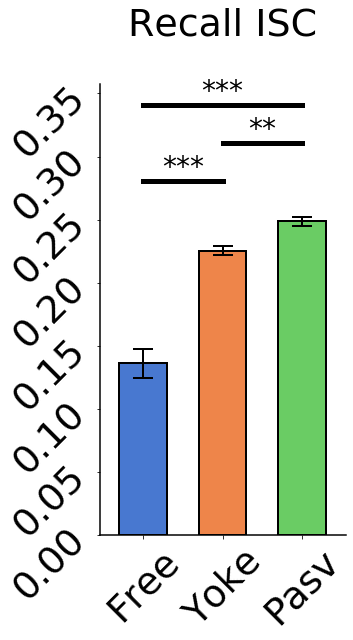

In [56]:
# 1. romance story: memory ISC compare across 3 conditions (for fig2)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = './1_bar_plots/data/bar_data.xlsx'
font_size = 38  # Define font size

df = pd.read_excel(file_path)

# Calculate the mean and standard error of the mean (SEM) for each condition
grouped_data_mean = df.groupby('cond')['recall_pw-isc'].mean()
grouped_data_sem = df.groupby('cond')['recall_pw-isc'].sem()

# Define seaborn color palette
colors = sns.color_palette("muted", 3)
significant_pairs = {'free vs yoke': 0.001, 'yoke vs pasv': 0.005, 'free vs pasv': 0.001}

# Ensure the bar plot aligns the conditions in the specified sequence
order = ['free', 'yoke', 'pasv']

# Remove the grid and set the figure style to white
plt.figure(figsize=(5, 9))
bars = grouped_data_mean[order].plot(kind='bar', yerr=grouped_data_sem[order], color=colors, edgecolor='black', linewidth=2, width=0.6, capsize=10, error_kw={'elinewidth': 2, 'capthick': 2})

# Set font size for x and y axis labels
plt.xlabel('')
plt.ylabel('')
plt.title('Recall ISC\n',fontsize=font_size)

# Adjust tick parameters for larger font size and capitalize x-tick labels
plt.xticks(rotation=45, fontsize=font_size)
plt.xticks(ticks=range(len(order)), labels=[label.capitalize() for label in order], fontsize=font_size)
plt.yticks(fontsize=font_size,rotation=45)

# Annotate significant differences with p-values and horizontal bridges
y_max = grouped_data_mean.max() + grouped_data_sem.max()
y_offset = 0.02  # Adjust offset for the starting point
significance_label_font_size = 18
sig_ls = ['***','**','***']
count=0
for pair in significant_pairs:
    cond1, cond2 = pair.split(' vs ')
    x1, x2 = order.index(cond1), order.index(cond2)
    y, h, col = y_max + y_offset, 0.01, 'k'  # y is the vertical position, h is height of the line above the bars
    plt.plot([x1, x2], [y, y], lw=5, color=col)  # Horizontal line
    plt.text((x1 + x2) * .5, y, sig_ls[count], ha='center', va='bottom', color=col, fontsize=28)
    count+=1
    y_offset += 0.03  # Increment the offset for the next annotation

# Enhance overall aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)

# Set solid colors for the bars
for bar, color in zip(bars.patches, colors):
    bar.set_alpha(1.0)  # Fully opaque

# Set the background color to white and remove the grid
plt.gcf().set_facecolor('white')
plt.grid(False)

# Save the figure as both .eps and .png files
plt.tight_layout()
plt.savefig('./1_bar_plots/barplot_rcl-isc.svg', format='svg')
plt.savefig('./1_bar_plots/barplot_rcl-isc.png', format='png')

# Show the plot
plt.show()


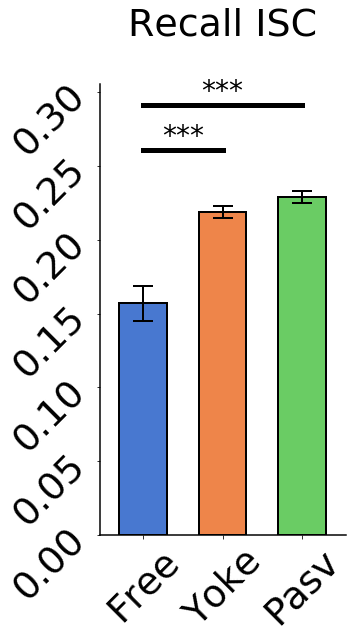

In [57]:
# 2. romance story: memory ISC (without choice events) compare across 3 conditions (for fig2)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = './1_bar_plots/data/bar_data.xlsx'
font_size = 38  # Define font size

df = pd.read_excel(file_path)

# Calculate the mean and standard error of the mean (SEM) for each condition
grouped_data_mean = df.groupby('cond')['recall_pw-isc_withoutChoiceEvents'].mean()
grouped_data_sem = df.groupby('cond')['recall_pw-isc_withoutChoiceEvents'].sem()

# Define seaborn color palette
colors = sns.color_palette("muted", 3)
significant_pairs = {
    'free vs yoke': 3.92e-06,
    'free vs pasv': 1.61e-08
}

# Ensure the bar plot aligns the conditions in the specified sequence
order = ['free', 'yoke', 'pasv']

# Remove the grid and set the figure style to white
plt.figure(figsize=(5, 9))
bars = grouped_data_mean[order].plot(kind='bar', yerr=grouped_data_sem[order], color=colors, edgecolor='black', linewidth=2, width=0.6, capsize=10, error_kw={'elinewidth': 2, 'capthick': 2})

# Set font size for x and y axis labels
plt.xlabel('')
plt.ylabel('')
plt.title('Recall ISC\n',fontsize=font_size)

# Adjust tick parameters for larger font size and capitalize x-tick labels
plt.xticks(rotation=45, fontsize=font_size)
plt.xticks(ticks=range(len(order)), labels=[label.capitalize() for label in order], fontsize=font_size)
plt.yticks(fontsize=font_size,rotation=45)

# Annotate significant differences with p-values and horizontal bridges
y_max = grouped_data_mean.max() + grouped_data_sem.max()
y_offset = 0.02  # Adjust offset for the starting point
significance_label_font_size = 18
for pair in significant_pairs:
    cond1, cond2 = pair.split(' vs ')
    x1, x2 = order.index(cond1), order.index(cond2)
    y, h, col = y_max + y_offset, 0.01, 'k'  # y is the vertical position, h is height of the line above the bars
    plt.plot([x1, x2], [y, y], lw=5, color=col)  # Horizontal line
    plt.text((x1 + x2) * .5, y, '***', ha='center', va='bottom', color=col, fontsize=28)
    y_offset += 0.03  # Increment the offset for the next annotation

# Enhance overall aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)

# Set solid colors for the bars
for bar, color in zip(bars.patches, colors):
    bar.set_alpha(1.0)  # Fully opaque

# Set the background color to white and remove the grid
plt.gcf().set_facecolor('white')
plt.grid(False)

# Save the figure as both .eps and .png files
plt.tight_layout()
plt.savefig('./1_bar_plots/barplot_rcl-isc_no-choices.svg', format='svg')
plt.savefig('./1_bar_plots/barplot_rcl-isc_no-choices.png', format='png')

# Show the plot
plt.show()


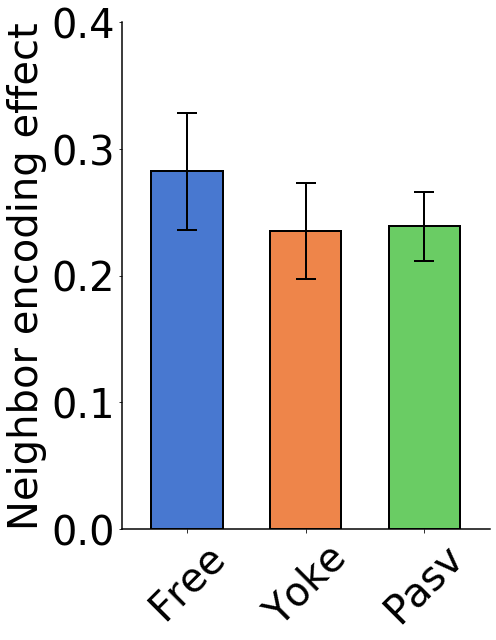

In [66]:
# 3. adventure story: neighbor encoding effect compare across 3 conditions (for fig4)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Excel file
file_path = './1_bar_plots/data/bar_data.xlsx'
font_size = 40  # Define font size

df = pd.read_excel(file_path, 2)

# Calculate the mean and standard error of the mean (SEM) for each condition
grouped_data_mean = df.groupby('cond')['nghb-ef'].mean()
grouped_data_sem = df.groupby('cond')['nghb-ef'].sem()

# Define seaborn color palette
colors = sns.color_palette("muted", 3)

# Ensure the bar plot aligns the conditions in the specified sequence
order = ['free', 'yoke', 'pasv']

# Remove the grid and set the figure style to white
plt.figure(figsize=(7, 9))
bars = grouped_data_mean[order].plot(kind='bar', yerr=grouped_data_sem[order], color=colors, edgecolor='black', linewidth=2, width=0.6, capsize=10, error_kw={'elinewidth': 2, 'capthick': 2})

# Set font size for x and y axis labels
plt.xlabel('')
plt.ylabel('Neighbor encoding effect', fontsize=font_size)

# Adjust tick parameters for larger font size and capitalize x-tick labels
plt.xticks(rotation=45, fontsize=font_size)
plt.xticks(ticks=range(len(order)), labels=[label.capitalize() for label in order], fontsize=font_size)

# Set y-tick intervals to 0.1
y_min, y_max = plt.ylim()
plt.yticks(np.arange(np.floor(y_min * 10) / 10, np.ceil(y_max * 10) / 10 + 0.1, 0.1), fontsize=font_size)

# Enhance overall aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)

# Set solid colors for the bars
for bar, color in zip(bars.patches, colors):
    bar.set_alpha(1.0)  # Fully opaque

# Set the background color to white and remove the grid
plt.gcf().set_facecolor('white')
plt.grid(False)

# Save the figure as both .eps and .png files
plt.tight_layout()
plt.savefig('./1_bar_plots/barplot_nghb-ef_adv.svg', format='svg')
plt.savefig('./1_bar_plots/barplot_nghb-ef_adv.png', format='png')

# Show the plot
plt.show()


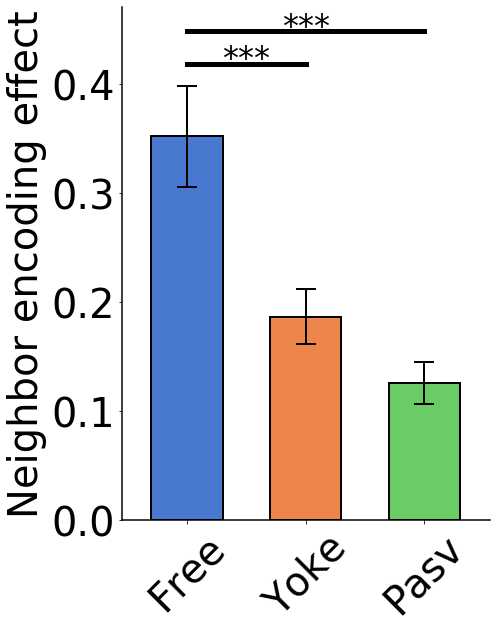

In [64]:
# 4. romance story: neighbor encoding effect compare across 3 conditions (for fig4)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = './1_bar_plots/data/bar_data.xlsx'
font_size = 40  # Define font size

df = pd.read_excel(file_path,1)

# Calculate the mean and standard error of the mean (SEM) for each condition
grouped_data_mean = df.groupby('cond')['nghb-ef'].mean()
grouped_data_sem = df.groupby('cond')['nghb-ef'].sem()

# Define seaborn color palette
colors = sns.color_palette("muted", 3)
significant_pairs = {'free vs yoke': 0.001, 'free vs pasv': 0.001}

# Ensure the bar plot aligns the conditions in the specified sequence
order = ['free', 'yoke', 'pasv']

# Remove the grid and set the figure style to white
plt.figure(figsize=(7, 9))
bars = grouped_data_mean[order].plot(kind='bar', yerr=grouped_data_sem[order], color=colors, edgecolor='black', linewidth=2, width=0.6, capsize=10, error_kw={'elinewidth': 2, 'capthick': 2})

# Set font size for x and y axis labels
plt.xlabel('')
plt.ylabel('Neighbor encoding effect',fontsize=font_size)

# Adjust tick parameters for larger font size and capitalize x-tick labels
plt.xticks(rotation=45, fontsize=font_size)
plt.xticks(ticks=range(len(order)), labels=[label.capitalize() for label in order], fontsize=font_size)
plt.yticks(fontsize=font_size)

# Annotate significant differences with p-values and horizontal bridges
y_max = grouped_data_mean.max() + grouped_data_sem.max()
y_offset = 0.02  # Adjust offset for the starting point
significance_label_font_size = 18
sig_ls = ['***','***']
count=0
for pair in significant_pairs:
    cond1, cond2 = pair.split(' vs ')
    x1, x2 = order.index(cond1), order.index(cond2)
    y, h, col = y_max + y_offset, 0.01, 'k'  # y is the vertical position, h is height of the line above the bars
    plt.plot([x1, x2], [y, y], lw=5, color=col)  # Horizontal line
    plt.text((x1 + x2) * .5, y-0.01, sig_ls[count], ha='center', va='bottom', color=col, fontsize=32)
    count+=1
    y_offset += 0.03  # Increment the offset for the next annotation

# Enhance overall aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)

# Set solid colors for the bars
for bar, color in zip(bars.patches, colors):
    bar.set_alpha(1.0)  # Fully opaque

# Set the background color to white and remove the grid
plt.gcf().set_facecolor('white')
plt.grid(False)

# Save the figure as both .eps and .png files
plt.tight_layout()
plt.savefig('./1_bar_plots/barplot_nghb-ef_romance.svg', format='svg')
plt.savefig('./1_bar_plots/barplot_nghb-ef_romance.png', format='png')

# Show the plot
plt.show()
